# UAS DATA MINING
Nama: Muhamad Naufal Daffa (2003217)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### IPM (Indeks Pembangunan Manusia) adalah ukuran kualitas sumber daya manusia.
PMI memiliki tiga dimensi: 
(1) umur panjang dan hidup sehat, 
(2) pengetahuan, dan 
(3) standar hidup layak

Untuk dimensi pertama, berlaku dataset persen_unmet_need_pelayanan_kesehatan.

Untuk dimensi kedua, berlaku dataset melek_huruf_diatas15 dan persen_penduduk_trampil_tik.

Untuk dimensi ketiga, berlaku dataset proporsi_hidup_dibawah_50_persen_median, ketidak_cukupan_pangan_prov.


In [2]:
df_needPelayananKes = pd.read_csv("..\\UAS\\data_source\\persen_unmet_need_pelayanan_kesehatan.csv")

df_trampilTik = pd.read_csv("..\\UAS\\data_source\\persen_penduduk_trampil_tik.csv")
df_melekHuruf15 = pd.read_csv("..\\UAS\\data_source\\melek_huruf_diatas15.csv")

df_cukupPanganProv = pd.read_csv("..\\UAS\\data_source\\ketidak_cukupan_pangan_prov.csv")
df_hidupDibawah50Median = pd.read_csv("..\\UAS\\data_source\\proporsi_hidup_dibawah_50_persen_median_pendapatan.csv")

df_pmi = pd.read_csv("..\\UAS\\data_source\\pmi.csv")

## Eksplorasi Data

### Need Pelayanan Kesehatan

In [3]:
df_needPelayananKes.head(3)

,tahun,persen_unmet_need_pelayanan_kesehatan,prov
0,2022,6.83,ACEH
1,2022,5.96,SUMATERA UTARA
2,2022,4.31,SUMATERA BARAT


#### EDA

#### Barplot tahun terhadap kebutuhan pelayanan masyarakat yang unmet

<AxesSubplot: xlabel='tahun', ylabel='persen_unmet_need_pelayanan_kesehatan'>

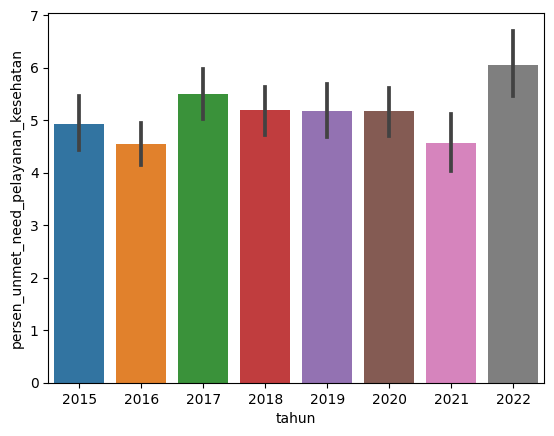

In [4]:
sns.barplot(data=df_needPelayananKes,x="tahun", y="persen_unmet_need_pelayanan_kesehatan")

berdasarkan barplot diatas, terlihat bahwa persen unmet pelayanan kesehatan rata-rata pada tahun 2022 tertinggi, dan ter-rendah merupakan di tahun 2016 dan 2021. Rendahnya di tahun 2021 dapat diakibatkan karena puncaknya pandemi covid-19 dimana banyak layanan kesehatan yang overwhelmed dengan jumlah pasien yang ada.

In [5]:
df_needPelayananKes = df_needPelayananKes.drop(df_needPelayananKes[((df_needPelayananKes["tahun"] < 2018) | (df_needPelayananKes["tahun"] > 2021) | (df_needPelayananKes["prov"] == "INDONESIA"))].index)

### Trampil TIK

In [6]:
df_trampilTik.head(3)

,tahun,persen_penduduk_trampil_tik,prov
0,2021,60.21,ACEH
1,2021,67.41,SUMATERA UTARA
2,2021,68.00,SUMATERA BARAT


#### Barplot tahun terhadap persentase penduduk trampil TIK

<AxesSubplot: xlabel='tahun', ylabel='persen_penduduk_trampil_tik'>

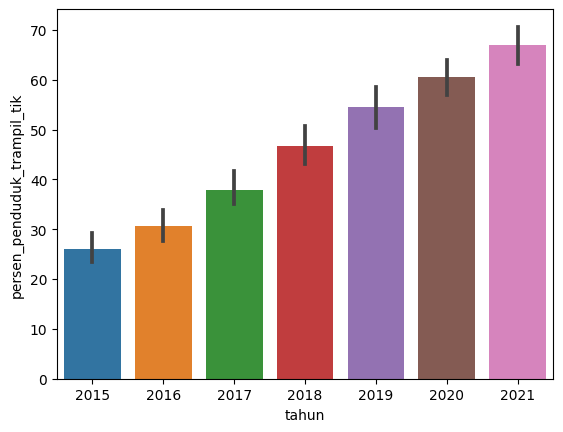

In [7]:
sns.barplot(data=df_trampilTik,x="tahun", y="persen_penduduk_trampil_tik")

Berdasarkan Barplot diatas, terdapat kemajuan penduduk terampil TIK sekitar 5% - 10% yang konstan tiap tahunnya

In [8]:
df_trampilTik = df_trampilTik.drop(df_trampilTik[((df_trampilTik["tahun"] < 2018) | (df_trampilTik["tahun"] > 2021) | (df_trampilTik["prov"] == "INDONESIA"))].index)

### Melek Huruf

In [9]:
df_melekHuruf15.head(4)

,prov,tahun,melek_huruf_diatas15
0,ACEH,2022,98.25
1,SUMATERA UTARA,2022,99.11
2,SUMATERA BARAT,2022,99.29
3,RIAU,2022,99.18


In [10]:
df_melekHuruf15 = df_melekHuruf15.drop(df_melekHuruf15[((df_melekHuruf15["tahun"] < 2018) | (df_melekHuruf15["tahun"] > 2021) | (df_melekHuruf15["prov"] == "INDONESIA"))].index)

### Cukup Pangan

In [11]:
df_cukupPanganProv.head(3)

,tahun,pct_tdk_cukup_pangan,prov
0,2021,6.90,ACEH
1,2021,6.33,SUMATERA UTARA
2,2021,6.02,SUMATERA BARAT


In [12]:
df_cukupPanganProv = df_cukupPanganProv.drop(df_cukupPanganProv[((df_cukupPanganProv["tahun"] < 2018) | (df_cukupPanganProv["tahun"] > 2021) | (df_cukupPanganProv["prov"] == "INDONESIA"))].index)

### Hidup Dibawah 50% Median

In [13]:
df_hidupDibawah50Median.head(3)

,tahun,proporsi_hidup_dibawah_50_persen_median_pendapatan,prov
0,2021,9.98,ACEH
1,2021,5.87,SUMATERA UTARA
2,2021,2.47,SUMATERA BARAT


In [14]:
df_hidupDibawah50Median = df_hidupDibawah50Median.drop(df_hidupDibawah50Median[((df_hidupDibawah50Median["tahun"] < 2018) | (df_hidupDibawah50Median["tahun"] > 2021) | (df_hidupDibawah50Median["prov"] == "INDONESIA"))].index)

### PMI

In [15]:
df_pmi.head(3)

,prov,tahun,kategori_pmi
0,ACEH,2022,TINGGI
1,SUMATERA UTARA,2022,TINGGI
2,SUMATERA BARAT,2022,TINGGI


In [16]:
df_pmi = df_pmi.drop(df_pmi[((df_pmi["tahun"] < 2018) | (df_pmi["tahun"] > 2021) | (df_pmi["prov"] == "INDONESIA"))].index)

## Merge

In [17]:
df_merge = pd.merge(df_pmi, df_needPelayananKes, how="left", on=["prov", "tahun"])
df_merge = pd.merge(df_merge, df_trampilTik, how="left", on=["prov", "tahun"])
df_merge = pd.merge(df_merge, df_melekHuruf15, how="left", on=["prov", "tahun"])
df_merge = pd.merge(df_merge, df_cukupPanganProv, how="left", on=["prov", "tahun"])
df_merge = pd.merge(df_merge, df_hidupDibawah50Median, how="left", on=["prov", "tahun"])

In [18]:
df_merge.head(3)

,prov,tahun,kategori_pmi,persen_unmet_need_pelayanan_kesehatan,persen_penduduk_trampil_tik,melek_huruf_diatas15,pct_tdk_cukup_pangan,proporsi_hidup_dibawah_50_persen_median_pendapatan
0,ACEH,2021,TINGGI,4.29,60.21,98.24,6.90,9.98
1,SUMATERA UTARA,2021,TINGGI,3.83,67.41,99.19,6.33,5.87
2,SUMATERA BARAT,2021,TINGGI,3.26,68.00,99.26,6.02,2.47


In [19]:
df_merge["melek_huruf_diatas15"] = df_merge["melek_huruf_diatas15"].astype("float")

In [20]:
df_merge["kategori_pmi"] = pd.Categorical(df_merge["kategori_pmi"], ordered = True, categories=["SANGAT RENDAH", "SEDANG", "TINGGI", "SANGAT TINGGI"])

<AxesSubplot: xlabel='kategori_pmi', ylabel='proporsi_hidup_dibawah_50_persen_median_pendapatan'>

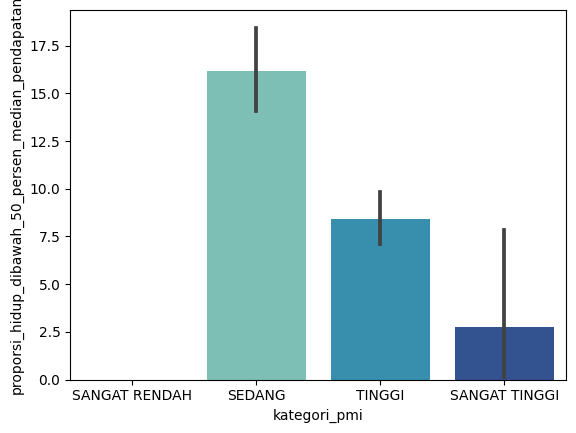

In [21]:
sns.barplot(x="kategori_pmi", y="proporsi_hidup_dibawah_50_persen_median_pendapatan", data=df_merge, palette="YlGnBu")

Berdasarkan barplot diatas, provinsi dengan kategori_pmi tinggi memiliki proporsi hidup dibawah 50 persen median pendapatan yang rendah.

In [22]:
df_merge = df_merge.drop(["tahun", "prov"], axis = 1)

### Persiapan data untuk Learning Klasifikasi

In [23]:
# penanganan kelas target
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_merge["kategori_pmi"])
Y = le.transform(df_merge["kategori_pmi"]) 

In [24]:
list(le.classes_)

['SANGAT TINGGI', 'SEDANG', 'TINGGI']

In [25]:
list(le.inverse_transform([1, 2, 0]))

['SEDANG', 'TINGGI', 'SANGAT TINGGI']

In [26]:
X = df_merge.drop("kategori_pmi",axis=1)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#simpan nama kolom untuk keperluan prediksi nanti 
import pickle
with open('..\\UAS\\pmi_x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)


## Classification Learning Menggunakan Random Forest & XGBoost

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf_RF = RandomForestClassifier(n_estimators=50, random_state=123)
clf_RF.fit(X_train, Y_train)
Y_pred = clf_RF.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.8928571428571429
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      0.90      0.90        10
           2       0.89      0.94      0.91        17

    accuracy                           0.89        28
   macro avg       0.60      0.61      0.60        28
weighted avg       0.86      0.89      0.88        28



In [30]:
import xgboost as xgb
clf_XG = xgb.XGBClassifier(objective = "multi:softprob", num_class = 3, eval_metric = "mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01, n_estimators = 10, nthread=-1)
# num_class adalah jumlah kelas
clf_XG.fit(X_train, Y_train)
Y_pred = clf_XG.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.8928571428571429
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      0.90      0.90        10
           2       0.89      0.94      0.91        17

    accuracy                           0.89        28
   macro avg       0.60      0.61      0.60        28
weighted avg       0.86      0.89      0.88        28



0: Sangat Tinggi, 1: Tinggi, 2: Sedang

Karena hasil kedua model sangat mirip, maka yang akan digunakan yaitu model RandomForest

In [31]:
import joblib
import pandas as pd
joblib.dump(clf_RF, '..\\UAS\\RF_order.joblib')

['..\\UAS\\RF_order.joblib']